# Clustering
You should build an end-to-end machine learning pipeline using a clustering model. In particular, you should do the following:
- Load the `customers` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Build an end-to-end machine learning pipeline, including a clustering model, such as [k-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [hdbscan](https://hdbscan.readthedocs.io/en/latest/), or [agglomerative clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html).
- Identify the optimal number of clusters using the elbow method or the silhouette score if needed.
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

### Import libraries

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

### Import dataset

In [3]:
customers_db = pd.read_csv('/Users/adolfomytr/Documents/Alemania/Master/GISMA/Materias/teaching-main/datasets/customers.csv')
customers_db = customers_db.set_index('ID')
customers_db.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


### K means algorithm

##### Elbow method to minimize the inertia selecting number of clusters

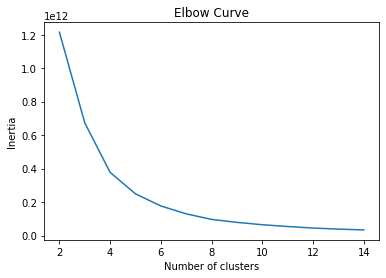

In [4]:
#Define range of clusters to measure
clus_range = range(2,15)

#Intertia list
inertia = []

#Loop over the range of clusters
for k in clus_range:
    kmeans = KMeans(n_clusters=k, n_init=20)
    kmeans.fit(customers_db)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(clus_range, inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

##### Measure using silhouette score

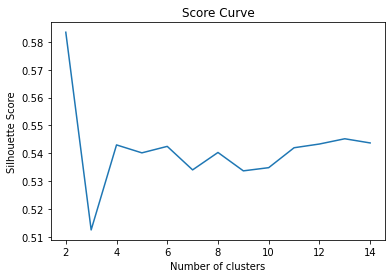

In [5]:
#Define range of clusters to measure
clus_range = range(2,15)

#Intertia list
silhouette = []

#Loop over the range of clusters
for s in clus_range:
    kmeans = KMeans(n_clusters=s, n_init=20)
    kmeans.fit(customers_db)
    silhouette.append(silhouette_score(customers_db, kmeans.labels_))

# Plot the elbow curve
plt.plot(clus_range, silhouette)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Score Curve')
plt.show()

##### Fit the model to the "elbow"

In [6]:
k_model = KMeans(n_clusters=5, init='k-means++', n_init=20)
k_model.fit(customers_db)
k_model.labels_

array([1, 4, 3, ..., 3, 0, 3], dtype=int32)

### Add column with labels to the original dataset for analysis

In [7]:
customers_db['Cluster'] = k_model.labels_
customers_db.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,1
100000002,1,1,22,1,150773,1,2,4
100000003,0,0,49,1,89210,0,0,3
100000004,0,0,45,1,171565,1,1,4
100000005,0,0,53,1,149031,1,1,1


##### Analyze the clusters

In [8]:
customers_db['Cluster'].value_counts()

0    719
1    562
3    366
4    280
2     73
Name: Cluster, dtype: int64

In [20]:
cluster_0 = customers_db[customers_db['Cluster'] == 0]
cluster_1 = customers_db[customers_db['Cluster'] == 1]
cluster_2 = customers_db[customers_db['Cluster'] == 2]
cluster_3 = customers_db[customers_db['Cluster'] == 3]
cluster_4 = customers_db[customers_db['Cluster'] == 4]

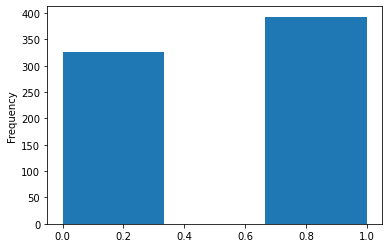

In [30]:
cluster_0['Sex'].plot(kind='hist', bins=3)
plt.show()